In [1]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import math
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gene_exp_df = pd.read_table('data/trunc_combined_rna_data.tsv', header=0, index_col=0)

In [3]:
data_logged = gene_exp_df.copy()
data_logged = np.log(data_logged)
data_logged.replace([np.inf, -np.inf], np.nan, inplace=True)

In [4]:
### Replace all NaNs with lowest possible values in matrix
a = list(data_logged.min())
lowest_possible_exp_value = math.floor(min(a))
# We want to replace all NaNs with a very small value.
# The smallest value is almost -5, therefore we can replace all NaNs with -5
# to ensure that an NaN represents the floor of the range.
data_logged.replace(np.nan, lowest_possible_exp_value, inplace=True)

In [5]:
pca = PCA()

In [6]:
reduced_data = pca.fit_transform(data_logged)

In [7]:
len(reduced_data)

20530

In [10]:
cell_type_info=pd.read_table('data/clinical/COADREAD.clin.merged.txt',index_col=0,skiprows=16)
cell_type_info=cell_type_info.loc["patient.tumor_tissue_site"]
cell_type_info={str(cell_type_info.index[i].upper()):str(cell_type_info[i]) for i in range(len(cell_type_info))}
cell_type_to_color={'colon':"blue","rectum":"red","nan":"green"}
cell_type_info

{'TCGA-3L-AA1B': 'colon',
 'TCGA-4N-A93T': 'colon',
 'TCGA-4T-AA8H': 'colon',
 'TCGA-5M-AAT4': 'colon',
 'TCGA-5M-AAT6': 'colon',
 'TCGA-5M-AATE': 'colon',
 'TCGA-A6-2671': 'colon',
 'TCGA-A6-2672': 'colon',
 'TCGA-A6-2674': 'colon',
 'TCGA-A6-2675': 'colon',
 'TCGA-A6-2676': 'colon',
 'TCGA-A6-2677': 'colon',
 'TCGA-A6-2678': 'colon',
 'TCGA-A6-2679': 'colon',
 'TCGA-A6-2680': 'colon',
 'TCGA-A6-2681': 'colon',
 'TCGA-A6-2682': 'colon',
 'TCGA-A6-2683': 'colon',
 'TCGA-A6-2684': 'colon',
 'TCGA-A6-2685': 'colon',
 'TCGA-A6-2686': 'colon',
 'TCGA-A6-3807': 'colon',
 'TCGA-A6-3808': 'colon',
 'TCGA-A6-3809': 'colon',
 'TCGA-A6-3810': 'colon',
 'TCGA-A6-4105': 'colon',
 'TCGA-A6-4107': 'colon',
 'TCGA-A6-5656': 'colon',
 'TCGA-A6-5657': 'colon',
 'TCGA-A6-5659': 'colon',
 'TCGA-A6-5660': 'colon',
 'TCGA-A6-5661': 'colon',
 'TCGA-A6-5662': 'colon',
 'TCGA-A6-5664': 'colon',
 'TCGA-A6-5665': 'colon',
 'TCGA-A6-5666': 'colon',
 'TCGA-A6-5667': 'colon',
 'TCGA-A6-6137': 'colon',
 'TCGA-A6-61

In [31]:
def plot_pca_components(x_axis_pc, y_axis_pc):
    plt.figure(figsize=(10,6))
    clrs=[cell_type_to_color[cell_type_info[x[:12]]] for x in data_logged.columns]
    print(clrs)
    for i, name in enumerate(data_logged.columns.tolist()):
        plt.scatter(reduced_data[i,x_axis_pc], reduced_data[i,y_axis_pc],c=clrs[i])
    plt.axvline()
    plt.axhline()
    plt.xlabel('PC'+str(x_axis_pc+1)+ ' (%.3f variance explained)'%pca.explained_variance_ratio_[x_axis_pc])
    plt.ylabel('PC'+str(y_axis_pc+1)+ ' (%.3f variance explained)'%pca.explained_variance_ratio_[y_axis_pc])

['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',

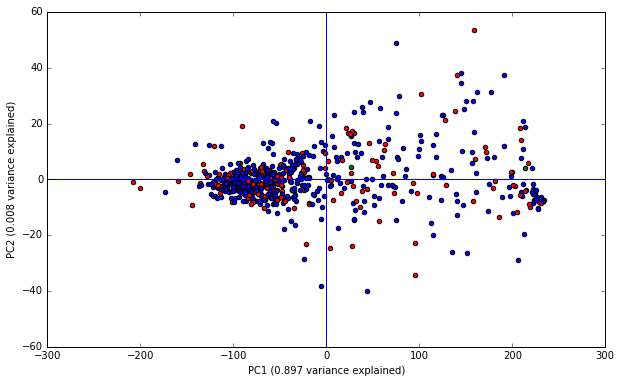

In [32]:
plot_pca_components(0, 1)

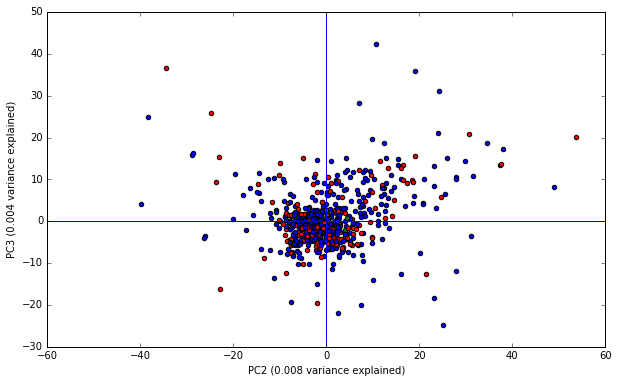

In [16]:
plot_pca_components(1, 2)